<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

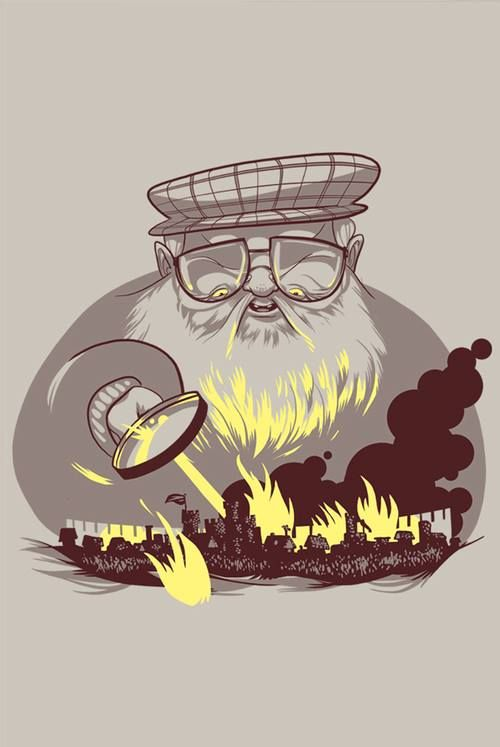

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [47]:
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 95.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("game_of_thrones_train.csv", index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [5]:
#удаляем колонки "mother", "isAliveMother", "father", "isAliveFather", "heir", "isAliveHeir", "culture", "dateOfBirth", "spouse", "isAliveSpouse"
#тк в них почти все значения пустые
data.drop(columns=["mother", "isAliveMother", "father", "isAliveFather", "heir", "isAliveHeir", "culture", "dateOfBirth", "spouse", "isAliveSpouse"], inplace=True)

In [6]:
import numpy as np

#заменим пустые значения в колонке "age" медианой
median_age = np.quantile(data['age'].dropna().values,q=0.5)
data["age"] = data["age"].fillna(median_age)

In [7]:
#заменим пустые значения в колонке "title" и "house" модой
data["title"] = data["title"].fillna(data["title"].mode()[0])
data["house"] = data["house"].fillna(data["house"].mode()[0])

In [8]:
data.isna().sum()

,0
name,0
title,0
male,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [9]:
#персонажей, с popularity score больше 0.5 всего 27, сделаем порогом популярности значение popularity score 0.1
len(data["popularity"][data["popularity"] >= 0.5])

27

In [10]:
#создание признака "isPopular"
mean = np.mean(data['popularity'].dropna().values)
conditions = [(data["popularity"] >= 0.1), (data["popularity"] < 0.1)]
choices = [1, 0]
data["isPopular"] = np.select(conditions, choices)

In [11]:
#создание признака "boolDeadRelations"
conditions = [(data["numDeadRelations"] > 0), (data["numDeadRelations"] == 0)]
choices = [1, 0]
data["boolDeadRelations"] = np.select(conditions, choices)

In [12]:
#колонку культура удалили

In [14]:
#можно также добавить признак "isHouseBig". Если дом принадлежит к одному из больших домов, то значение в этой колонке равно 1, если нет, то 0.
#список больших домов определим на тренировочном датасете

house_dict = data["house"].value_counts().to_dict() #словарь всех домов в датасете
big_houses = [house for house in house_dict if house_dict[house] >= 4]
data["isHouseBig"] = np.where(data["house"].isin(big_houses), 1, 0)

In [15]:
#удаляем теперь колонки "popularity", "numDeadRelations", "house"
data.drop(columns=["popularity", "numDeadRelations", "house"], inplace=True)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [16]:
data.columns

Index(['name', 'title', 'male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'age', 'isAlive', 'isPopular',
       'boolDeadRelations', 'isHouseBig'],
      dtype='object')

In [17]:
#имя не влияет на то, жив персонаж или нет
data.drop(columns=["name"], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

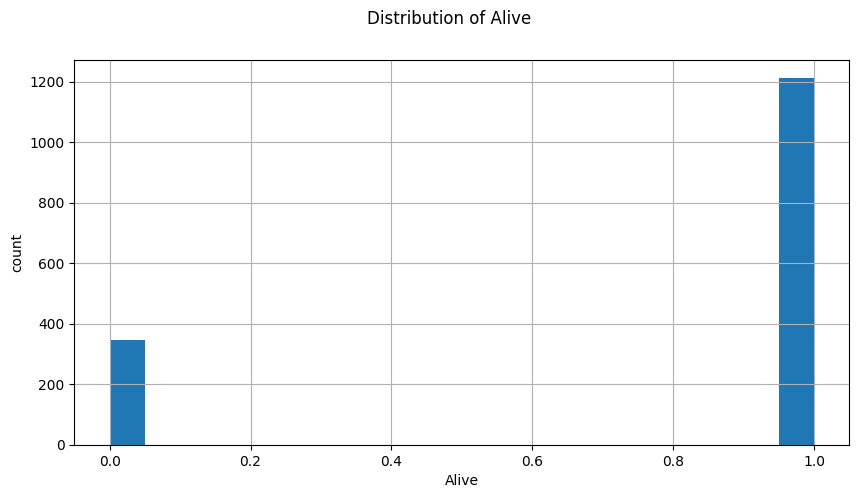

In [19]:
#целевая переменная "isAlive" является категориальной (либо жив - 1, либо мертв - 0)
#проверим, сбалансирован датасет или нет
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alive')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

data["title"] = label_encoding.fit_transform(data["title"])

In [21]:
# у нас уже остлаись только признаки в числах
data.head()

,title,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations,isHouseBig
S.No,,,,,,,,,,,,,,
1,163,1,0,0,0,0,0,0,0,24.0,0,1,1,1
2,115,1,1,1,1,1,1,1,1,97.0,1,1,1,1
3,163,1,0,0,0,1,0,0,1,24.0,1,1,0,1
4,145,0,0,0,0,0,0,1,1,23.0,0,1,0,1
5,53,0,0,0,0,1,0,1,1,29.0,1,0,0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

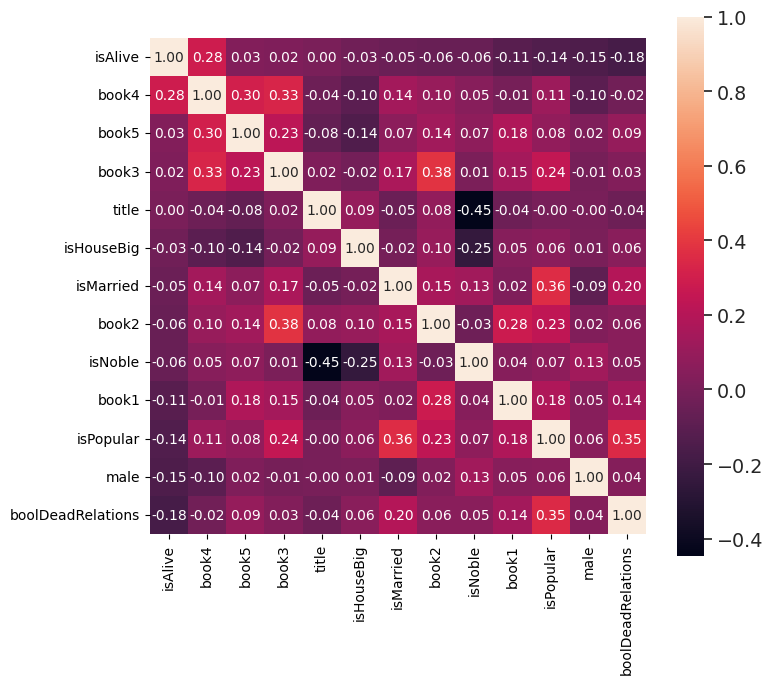

In [22]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(8, 7))
# correlation matrix
k = 13 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
#Видно, что признаки "book5", "book3", "title", "isHouseBig", "isMarried", "book2", "isNoble", "book1" слабо коррелируют с целевой переменной,
#поэтому удалим их

data.drop(columns=["book5", "book3", "title", "isHouseBig", "isMarried", "book2", "isNoble", "book1"], inplace=True)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [24]:
X = data.drop(['isAlive'], axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [27]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [28]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [32]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [29]:
# Шаг 1. создание модели
random_forest_classifier = RandomForestClassifier()

# Шаг 2. обучение модели
random_forest_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = random_forest_classifier.predict(X_test)

In [35]:
# Шаг 1. создание модели
ada_boost_classifier = AdaBoostClassifier()

# Шаг 2. обучение модели
ada_boost_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost_classifier.predict(X_test)

In [37]:
# Шаг 1. создание модели
gaussian_process_classifier = GaussianProcessClassifier(n_restarts_optimizer=5, max_iter_predict=200)

# Шаг 2. обучение модели
gaussian_process_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_process_classifier.predict(X_test)

In [39]:
# Шаг 1. создание модели
gaussian_NB = GaussianNB()

# Шаг 2. обучение модели
gaussian_NB.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_NB.predict(X_test)

In [41]:
# Шаг 1. создание модели
KNeighbors_classifier = KNeighborsClassifier()

# Шаг 2. обучение модели
KNeighbors_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = KNeighbors_classifier.predict(X_test)

In [43]:
# Шаг 1. создание модели
svc = SVC()

# Шаг 2. обучение модели
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_test)

In [45]:
# Шаг 1. создание модели
decision_tree_classifier = DecisionTreeClassifier()

# Шаг 2. обучение модели
decision_tree_classifier.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = decision_tree_classifier.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [33]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [34]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8205


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [36]:
# Шаг 3. Предсказание на тестовых данных
y_pred = random_forest_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


In [38]:
# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_process_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8750


In [40]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_NB.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


In [42]:
# Шаг 3. Предсказание на тестовых данных
y_pred = KNeighbors_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8141


In [44]:
# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7917


In [46]:
# Шаг 3. Предсказание на тестовых данных
y_pred = decision_tree_classifier.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109
